In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x = [32, 21, 24, 35, 10, 11, 22, 21, 27, 2]
y = [2000,1000,1500,2500,500,900,1100,1500,1800, 250]
df = pd.DataFrame([x,y]).T
df.columns = ['X', 'Y']
df

,X,Y
0,32,2000
1,21,1000
2,24,1500
3,35,2500
4,10,500
5,11,900
6,22,1100
7,21,1500
8,27,1800
9,2,250


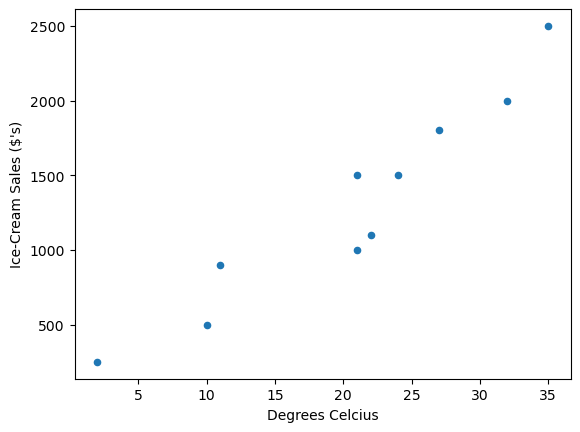

In [3]:
ax = df.plot(
    x='X', 
    y='Y', 
    kind='scatter', 
    ylabel='Ice-Cream Sales ($\'s)', 
    xlabel='Degrees Celcius'
)

In [4]:
α = 5
β = 10
df['Y_hat'] = α + β * df['X']

<Axes: xlabel='X', ylabel='Y'>

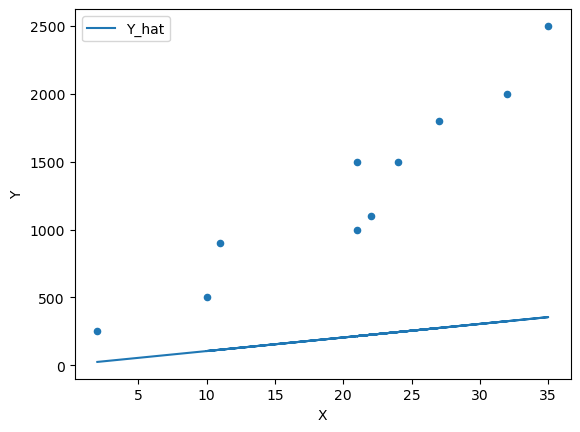

In [5]:
fig, ax = plt.subplots()
df.plot(x='X',y='Y', kind='scatter', ax=ax)
df.plot(x='X',y='Y_hat', kind='line', ax=ax)

In [6]:
β = 100
df['Y_hat'] = α + β * df['X']

<Axes: xlabel='X', ylabel='Y'>

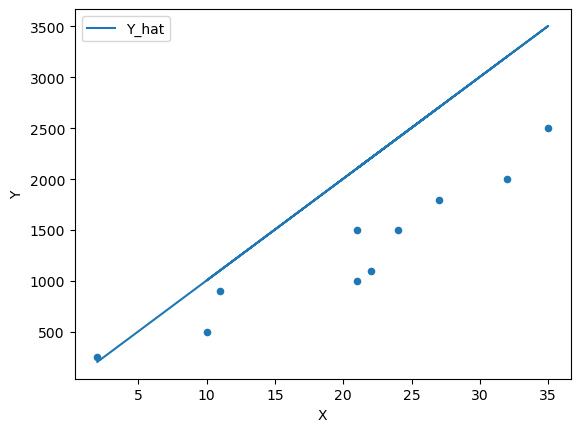

In [7]:
fig, ax = plt.subplots()
df.plot(x='X',y='Y', kind='scatter', ax=ax)
df.plot(x='X',y='Y_hat', kind='line', ax=ax)

In [8]:
β = 65
df['Y_hat'] = α + β * df['X']

<Axes: xlabel='X', ylabel='Y'>

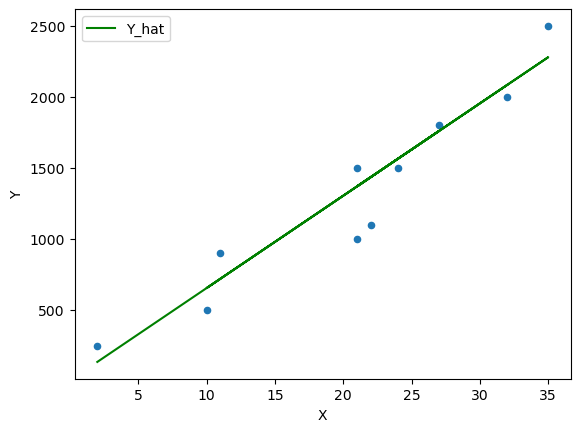

In [9]:
fig, ax = plt.subplots()
df.plot(x='X',y='Y', kind='scatter', ax=ax)
df.plot(x='X',y='Y_hat', kind='line', ax=ax, color='g')

In [10]:
df['error'] = df['Y_hat'] - df['Y']

In [11]:
df

,X,Y,Y_hat,error
0,32,2000,2085,85
1,21,1000,1370,370
2,24,1500,1565,65
3,35,2500,2280,-220
4,10,500,655,155
5,11,900,720,-180
6,22,1100,1435,335
7,21,1500,1370,-130
8,27,1800,1760,-40
9,2,250,135,-115


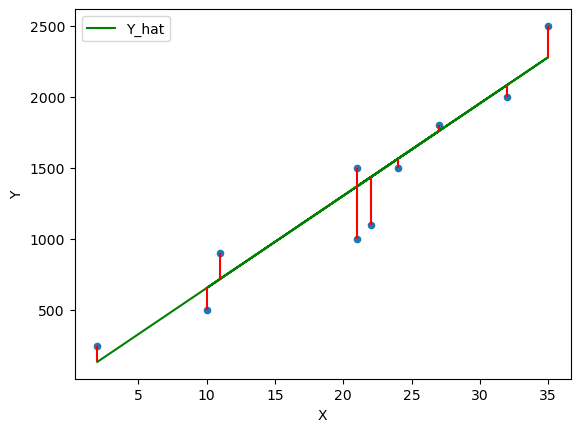

In [12]:
fig, ax = plt.subplots()
df.plot(x='X',y='Y', kind='scatter', ax=ax)
df.plot(x='X',y='Y_hat', kind='line', ax=ax, color='g')
plt.vlines(df['X'], df['Y_hat'], df['Y'], color='r');

In [13]:
β_optimal = 64.38
α_optimal = -14.72

In [14]:
errors = {}
for β in np.arange(20,100,0.5):
    errors[β] = abs((α_optimal + β * df['X']) - df['Y']).sum()

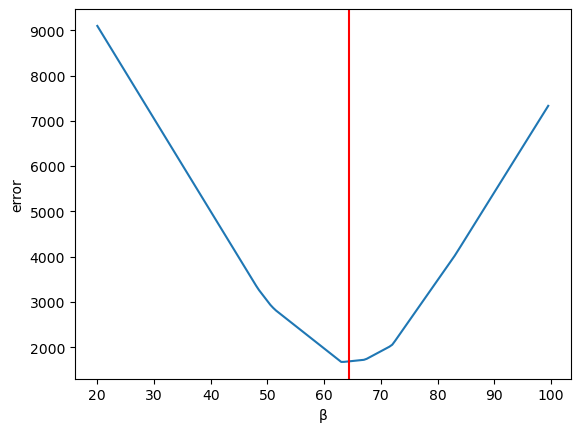

In [15]:
ax = pd.Series(errors).plot(xlabel='β', ylabel='error')
plt.axvline(β_optimal, color='r');

In [16]:
errors = {}
for α in np.arange(-500,500,5):
    errors[α] = abs((α + β_optimal * df['X']) - df['Y']).sum()

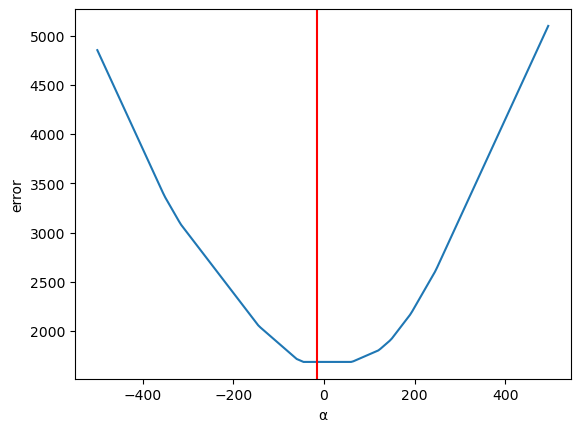

In [17]:
ax = pd.Series(errors).plot(xlabel='α', ylabel='error')
plt.axvline(α_optimal, color='r');

In [18]:
df = df[['X','Y']].copy()  # Original Data

# Calculate the sample means
x_bar = df['X'].mean()
y_bar = df['Y'].mean()

In [19]:
# Compute the Sums
df['num'] = df['X'] * df['Y'] - y_bar * df['X']
df['den'] = pow(df['X'],2) - x_bar * df['X']
β = df['num'].sum() / df['den'].sum()
print(β)

64.37665782493369


In [20]:
α = y_bar - β * x_bar
print(α)

-14.72148541114052


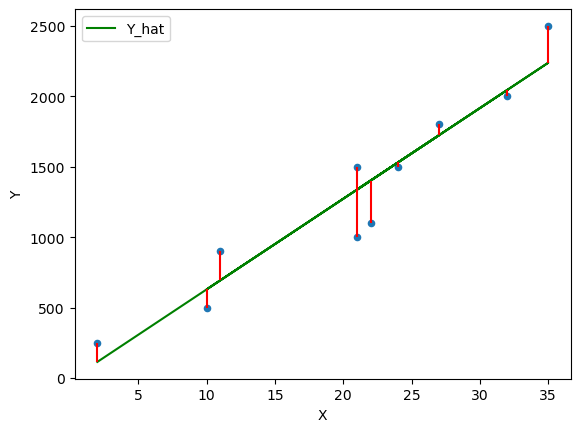

In [21]:
df['Y_hat'] = α + β * df['X']
df['error'] = df['Y_hat'] - df['Y']

fig, ax = plt.subplots()
df.plot(x='X',y='Y', kind='scatter', ax=ax)
df.plot(x='X',y='Y_hat', kind='line', ax=ax, color='g')
plt.vlines(df['X'], df['Y_hat'], df['Y'], color='r');

In [22]:
fl = "_static/lecture_specific/simple_linear_regression/life-expectancy-vs-gdp-per-capita.csv"  # TODO: Replace with GitHub link
df = pd.read_csv(fl, nrows=10)

In [23]:
df

,Entity,Code,Year,Life expectancy at birth (historical),GDP per capita,417485-annotations,Population (historical estimates),Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,1950,27.7,1156.0,NaN,7480464.0,NaN
2,Afghanistan,AFG,1951,28.0,1170.0,NaN,7571542.0,NaN
3,Afghanistan,AFG,1952,28.4,1189.0,NaN,7667534.0,NaN
4,Afghanistan,AFG,1953,28.9,1240.0,NaN,7764549.0,NaN
5,Afghanistan,AFG,1954,29.2,1245.0,NaN,7864289.0,NaN
6,Afghanistan,AFG,1955,29.9,1246.0,NaN,7971933.0,NaN
7,Afghanistan,AFG,1956,30.4,1278.0,NaN,8087730.0,NaN
8,Afghanistan,AFG,1957,30.9,1253.0,NaN,8210207.0,NaN
9,Afghanistan,AFG,1958,31.5,1298.0,NaN,8333827.0,NaN


In [24]:
cols = ['Code', 'Year', 'Life expectancy at birth (historical)', 'GDP per capita']
df = pd.read_csv(fl, usecols=cols)
df

,Code,Year,Life expectancy at birth (historical),GDP per capita
0,OWID_ABK,2015,NaN,NaN
1,AFG,1950,27.7,1156.0
2,AFG,1951,28.0,1170.0
3,AFG,1952,28.4,1189.0
4,AFG,1953,28.9,1240.0
...,...,...,...,...
62151,ZWE,1946,NaN,NaN
62152,ZWE,1947,NaN,NaN
62153,ZWE,1948,NaN,NaN
62154,ZWE,1949,NaN,NaN


In [25]:
df.columns = ["cntry", "year", "life_expectancy", "gdppc"]
df

,cntry,year,life_expectancy,gdppc
0,OWID_ABK,2015,NaN,NaN
1,AFG,1950,27.7,1156.0
2,AFG,1951,28.0,1170.0
3,AFG,1952,28.4,1189.0
4,AFG,1953,28.9,1240.0
...,...,...,...,...
62151,ZWE,1946,NaN,NaN
62152,ZWE,1947,NaN,NaN
62153,ZWE,1948,NaN,NaN
62154,ZWE,1949,NaN,NaN


In [26]:
df.dropna(inplace=True)

In [27]:
df

,cntry,year,life_expectancy,gdppc
1,AFG,1950,27.7,1156.0000
2,AFG,1951,28.0,1170.0000
3,AFG,1952,28.4,1189.0000
4,AFG,1953,28.9,1240.0000
5,AFG,1954,29.2,1245.0000
...,...,...,...,...
61960,ZWE,2014,58.8,1594.0000
61961,ZWE,2015,59.6,1560.0000
61962,ZWE,2016,60.3,1534.0000
61963,ZWE,2017,60.7,1582.3662


In [28]:
le_years = df[['cntry', 'year', 'life_expectancy']].set_index(['cntry', 'year']).unstack()['life_expectancy']
le_years

year,1543,1548,1553,1558,1563,1568,1573,1578,1583,1588,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
cntry,,,,,,,,,,,,,,,,,,,,,
AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,60.4,60.9,61.4,61.9,62.4,62.5,62.7,63.1,63.0,63.1
AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,55.8,56.7,57.6,58.6,59.3,60.0,60.7,61.1,61.7,62.1
ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,77.8,77.9,78.1,78.1,78.1,78.4,78.6,78.9,79.0,79.2
ARE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,78.0,78.3,78.5,78.7,78.9,79.0,79.2,79.3,79.5,79.6
ARG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,75.9,75.7,76.1,76.5,76.5,76.8,76.8,76.3,76.8,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VNM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,73.5,73.5,73.7,73.7,73.8,73.9,73.9,73.9,74.0,74.0
YEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,67.2,67.3,67.4,67.3,67.5,67.4,65.9,66.1,66.0,64.6
ZAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,57.4,58.9,60.7,61.8,62.5,63.4,63.9,64.7,65.4,65.7


In [29]:
le_years[~le_years[1543].isna()]

year,1543,1548,1553,1558,1563,1568,1573,1578,1583,1588,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
cntry,,,,,,,,,,,,,,,,,,,,,
GBR,33.94,38.82,39.59,22.38,36.66,39.67,41.06,41.56,42.7,37.05,...,80.2,80.4,80.8,80.9,80.9,81.2,80.9,81.1,81.2,81.1


<Axes: xlabel='year'>

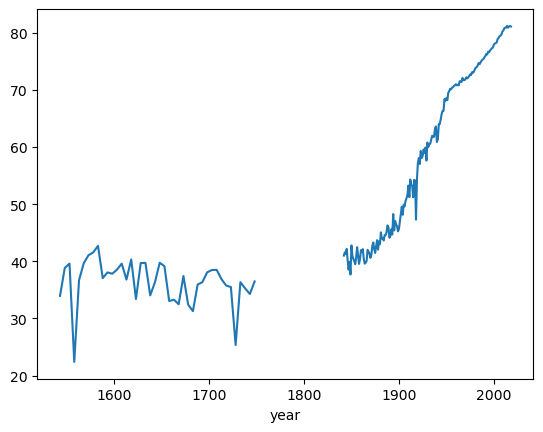

In [30]:
le_years.loc['GBR'].plot()

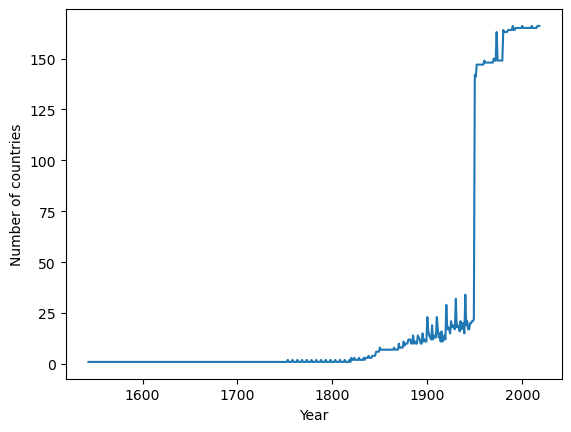

In [31]:
le_years.stack().unstack(level=0).count(axis=1).plot(xlabel="Year", ylabel="Number of countries");

In [32]:
df = df[df.year == 2018].reset_index(drop=True).copy()

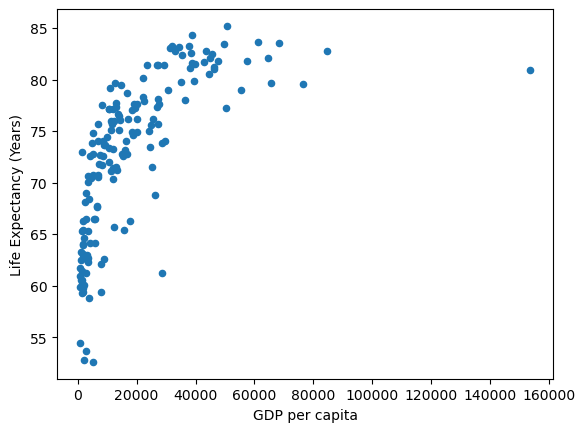

In [33]:
df.plot(x='gdppc', y='life_expectancy', kind='scatter',  xlabel="GDP per capita", ylabel="Life Expectancy (Years)",);

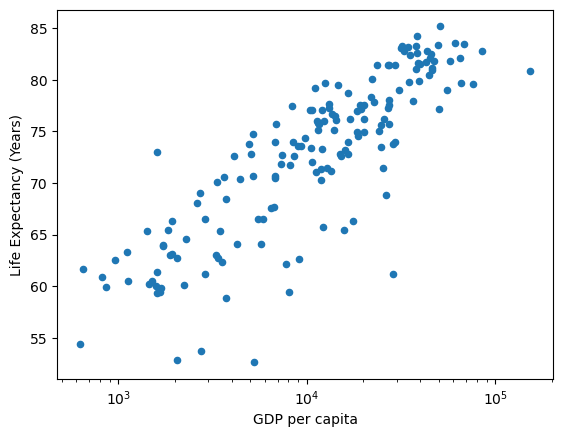

In [34]:
df.plot(x='gdppc', y='life_expectancy', kind='scatter',  xlabel="GDP per capita", ylabel="Life Expectancy (Years)", logx=True);

In [35]:
df['log_gdppc'] = df['gdppc'].apply(np.log10)

In [36]:
df

,cntry,year,life_expectancy,gdppc,log_gdppc
0,AFG,2018,63.1,1934.5550,3.286581
1,ALB,2018,79.2,11104.1660,4.045486
2,DZA,2018,76.1,14228.0250,4.153145
3,AGO,2018,62.1,7771.4420,3.890502
4,ARG,2018,77.0,18556.3830,4.268493
...,...,...,...,...,...
161,VNM,2018,74.0,6814.1420,3.833411
162,OWID_WRL,2018,72.6,15212.4150,4.182198
163,YEM,2018,64.6,2284.8900,3.358865
164,ZMB,2018,62.3,3534.0337,3.548271


In [37]:
data = df[['log_gdppc', 'life_expectancy']].copy()  # Get Data from DataFrame

# Calculate the sample means
x_bar = data['log_gdppc'].mean()
y_bar = data['life_expectancy'].mean()

In [38]:
data

,log_gdppc,life_expectancy
0,3.286581,63.1
1,4.045486,79.2
2,4.153145,76.1
3,3.890502,62.1
4,4.268493,77.0
...,...,...
161,3.833411,74.0
162,4.182198,72.6
163,3.358865,64.6
164,3.548271,62.3


In [39]:
# Compute the Sums
data['num'] = data['log_gdppc'] * data['life_expectancy'] - y_bar * data['log_gdppc']
data['den'] = pow(data['log_gdppc'],2) - x_bar * data['log_gdppc']
β = data['num'].sum() / data['den'].sum()
print(β)

12.643730292819704


In [40]:
α = y_bar - β * x_bar
print(α)

21.702096701389053


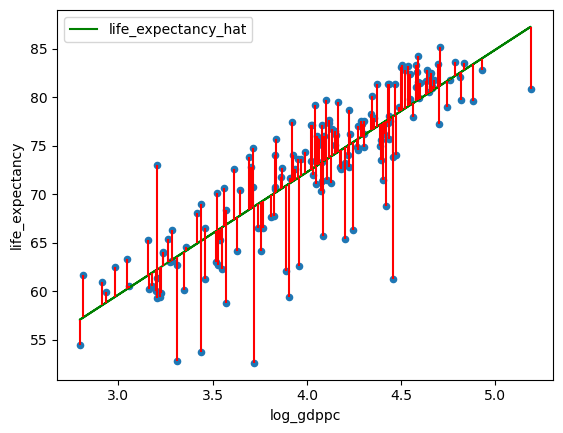

In [41]:
data['life_expectancy_hat'] = α + β * df['log_gdppc']
data['error'] = data['life_expectancy_hat'] - data['life_expectancy']

fig, ax = plt.subplots()
data.plot(x='log_gdppc',y='life_expectancy', kind='scatter', ax=ax)
data.plot(x='log_gdppc',y='life_expectancy_hat', kind='line', ax=ax, color='g')
plt.vlines(data['log_gdppc'], data['life_expectancy_hat'], data['life_expectancy'], color='r')